In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
pd.options.display.float_format = '{:,.2f}'.format

In [39]:
dateparser = lambda x: datetime.strptime(x, "%m/%d/%y")
floatparser = lambda x:  float(x.replace(',','')[2:])
df = pd.read_csv('hybrid_in_transit_2019.csv', converters={0 : dateparser, 1 : floatparser, 2 : floatparser})
df.columns = ['date', 'in_transit_ci_value', 'outstanding_principal']

# Don't Need below column this was for a prior addition to the lesson
df['collateral_coverage'] = (df.in_transit_ci_value / df.outstanding_principal)


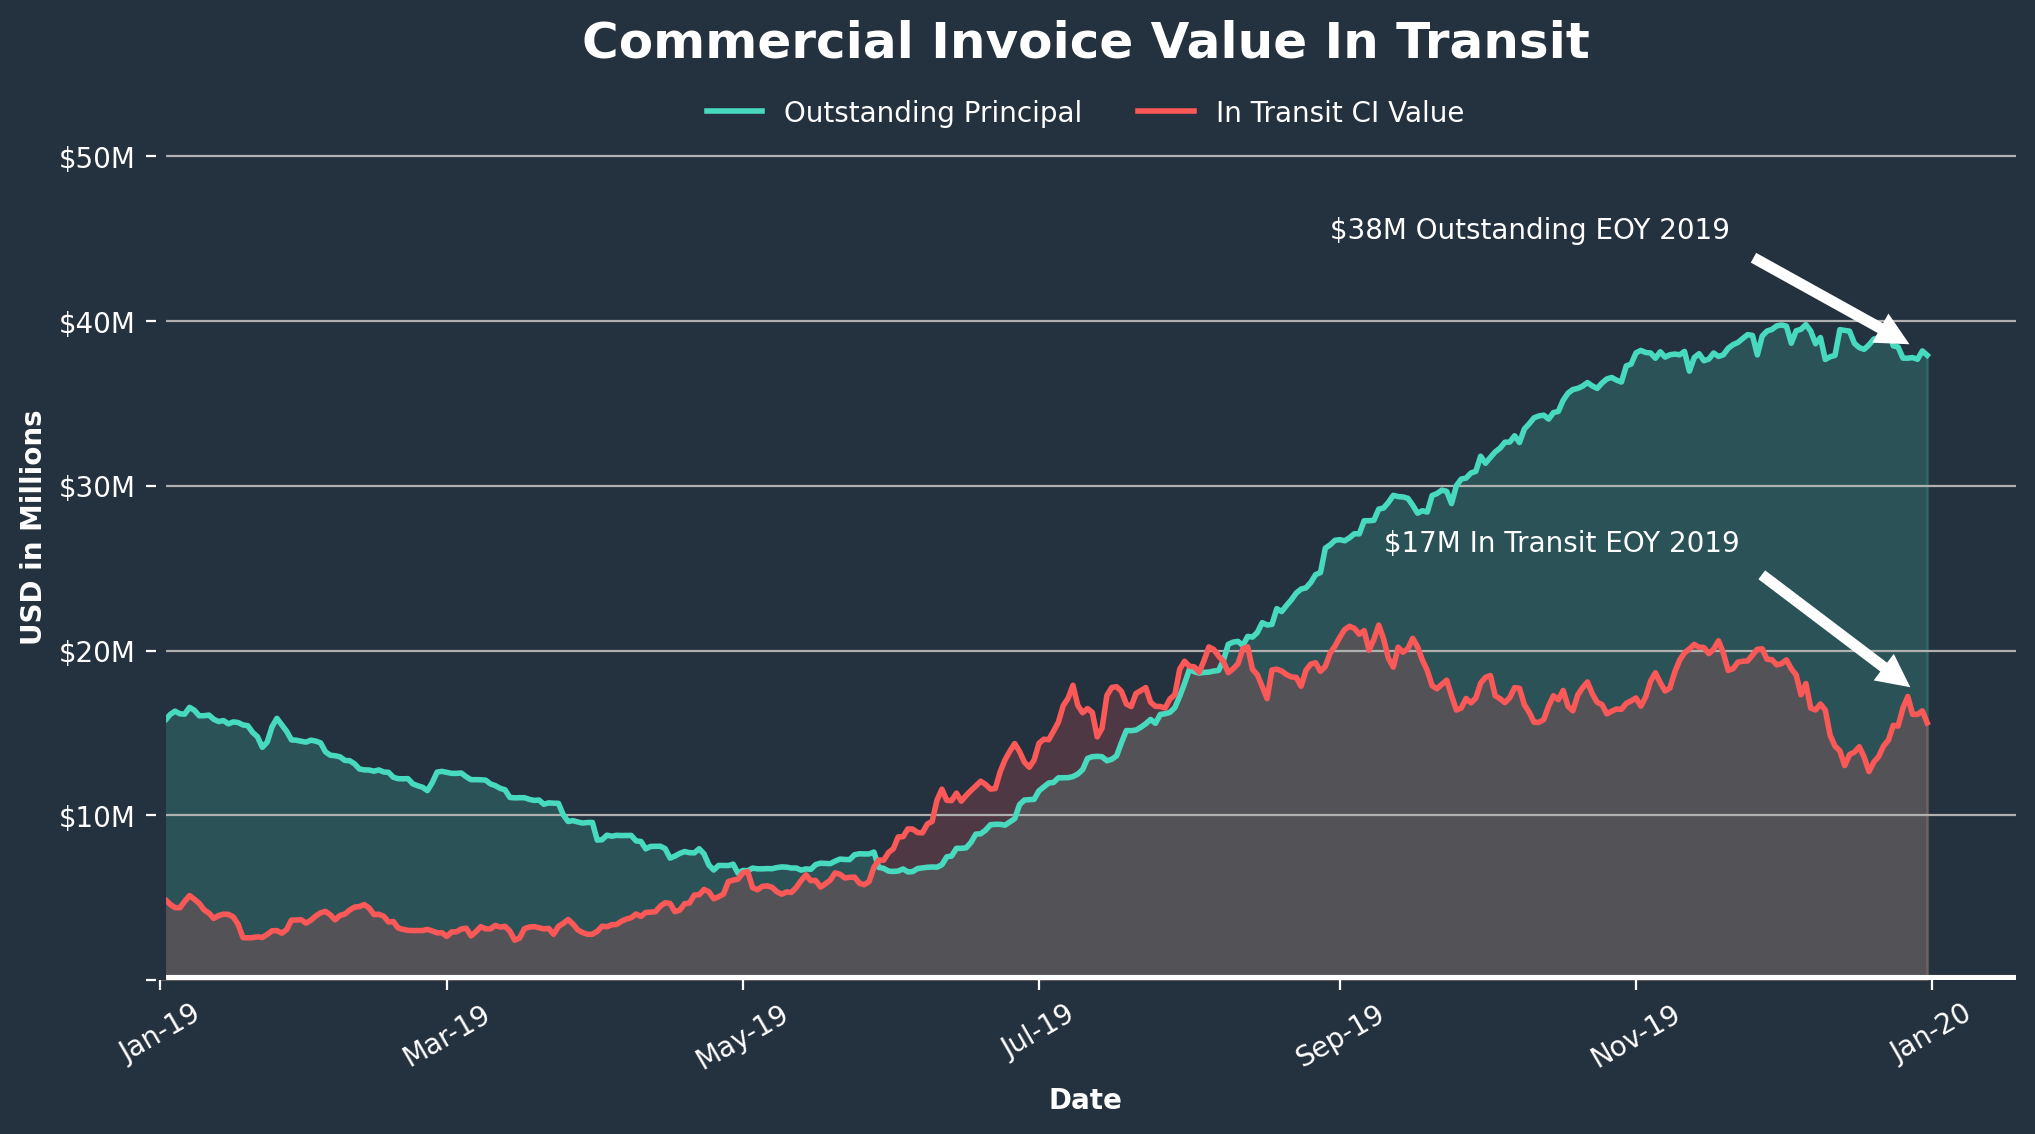

In [82]:
fig = plt.figure(figsize=(12,6),dpi=200)
fig.set_facecolor("#24313e")
ax1 = fig.add_subplot(1,1,1, frameon=False)
ax1.plot(df.date.tolist(),df.outstanding_principal.div(1000000).tolist(), linewidth=2.0, color="#47dabe", label='Outstanding Principal')
ax1.plot(df.date.tolist(),df.in_transit_ci_value.div(1000000).tolist(), 'b-', linewidth=2.0, color="#fb5858", label='In Transit CI Value')
ax1.axhline(linewidth=4, color='white')
ax1.axvline(linewidth=4, color="#24313e", x=datetime.strptime('2019-01-01', '%Y-%m-%d'))
ax1.set_xlim(left=datetime.strptime('2018-12-31', '%Y-%m-%d'))
ax1.yaxis.set_ticks(np.arange(0, 51, 10))
ax1.set_ylim(bottom=0, top=55)
ax1.xaxis.set_major_formatter(DateFormatter('%b-%y'))
ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('$%.0fM'))
ax1.set_title('Commercial Invoice Value In Transit', fontweight='bold', fontsize=18, color="white")
ax1.set_xlabel('Date', color="white", fontweight='bold')
ax1.set_ylabel('USD in Millions', fontweight='bold')
ax1.set_facecolor('#24313e')
ax1.grid(which='major', axis='y', linestyle='-')
ax1.grid(which='major', axis='x', linestyle='')
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.tick_params( colors='white')
yticks = ax1.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
ax1.fill_between(df.date,df.outstanding_principal.div(1000000), color="#47dabe", alpha=0.2)
ax1.fill_between(df.date,df.in_transit_ci_value.div(1000000), color="#fb5858", alpha=0.2)
ax1.tick_params(axis='x', labelrotation=30)
leg = ax1.legend(loc=9, ncol=2, facecolor="none", edgecolor="none")
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
annotation = ax1.annotate('$38M Outstanding EOY 2019',
            xy=(datetime.strptime('2019-12-31','%Y-%m-%d'), 38),
            xytext=(datetime.strptime('2019-8-30','%Y-%m-%d'), 45),
            xycoords='data',
            textcoords='data',
            color='white',
            arrowprops=dict(facecolor='white', shrink=0.09, edgecolor='none'),
            clip_on=True)
annotation = ax1.annotate('$17M In Transit EOY 2019',
            xy=(datetime.strptime('2019-12-31','%Y-%m-%d'), 17),
            xytext=(datetime.strptime('2019-9-10','%Y-%m-%d'), 26),
            xycoords='data',
            textcoords='data',
            color='white',
            arrowprops=dict(facecolor='white', shrink=0.09,edgecolor='none'),
            clip_on=True)

fig.savefig('challenge_chart.png', dpi=200, facecolor='#24313e', edgecolor='#24313e', orientation='landscape', papertype=None, format=None,
       transparent=False, bbox_inches=None, pad_inches=0.3, metadata=None)
